In [2]:
from model import Fitness

# Data visualization tools.
import seaborn as sns
import seaborn.objects as so

In [3]:
model = Fitness(30, 10, 10, mutation=True)

for _ in range(15000):
    model.step()

model_data = model.datacollector.get_model_vars_dataframe()
agent_data = model.datacollector.get_agent_vars_dataframe()

In [3]:
print(agent_data)

agent_data.to_csv('agent_data_output.csv')

                  Energy   Fitness     Role
Step  AgentID                              
0     1        25.841101 -0.056231  carrier
      2        23.838636  0.676700  carrier
      3        23.046748  0.928984  carrier
      4        26.382058  1.573549  carrier
      5        22.477663  0.432336  carrier
...                  ...       ...      ...
15000 1296     49.000000  1.704537    giver
      1300     50.000000  1.720880    giver
      1301     47.000000  1.489700    giver
      1304     50.000000  1.828860    giver
      1306     49.000000  1.836849    giver

[5584160 rows x 3 columns]


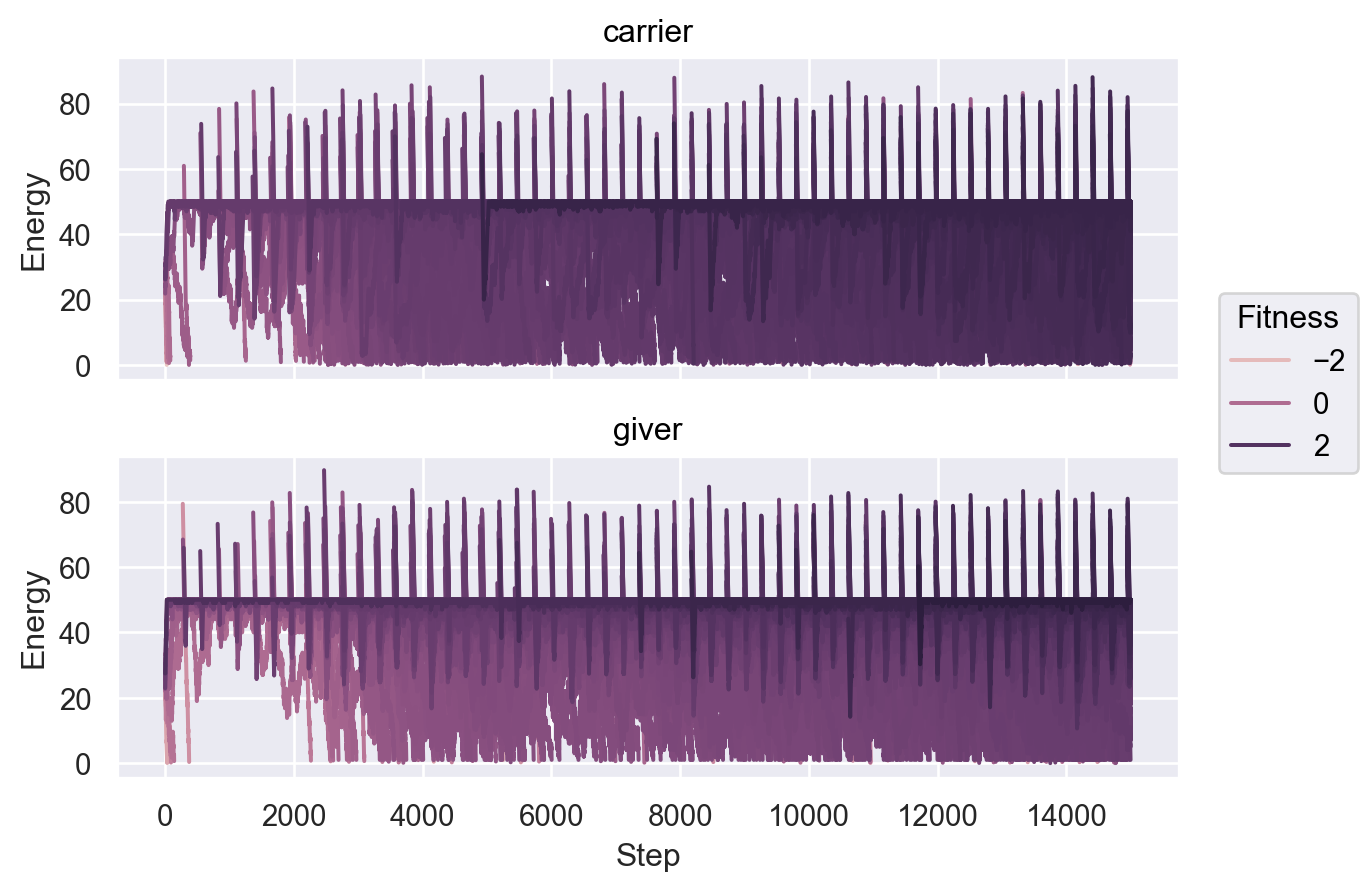

In [4]:
(
    so.Plot(agent_data, x="Step", y="Energy", color="Fitness")
    .facet(row="Role")
    .add(so.Line())
)

In [8]:
print(model_data)

       Avg Fitness  Population  Carriers  Givers
0         0.035123          30        15      15
1         0.035123          30        15      15
2         0.035123          30        15      15
3         0.035123          30        15      15
4         0.035123          30        15      15
...            ...         ...       ...     ...
14996     1.768288         612        15     597
14997     1.768288         612        15     597
14998     1.768288         612        15     597
14999     1.768288         612        15     597
15000     1.768288         612        15     597

[15001 rows x 4 columns]


<Axes: xlabel='None', ylabel='Avg Fitness'>

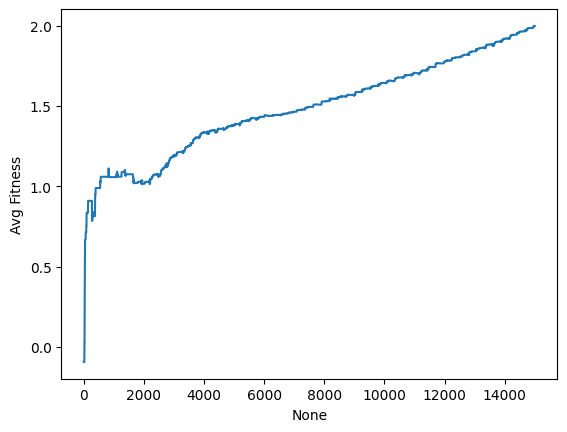

In [5]:
sns.lineplot(
    data=model_data,
    x=model_data.index,
    y="Avg Fitness",
    legend=False
)

<Axes: xlabel='None', ylabel='Population'>

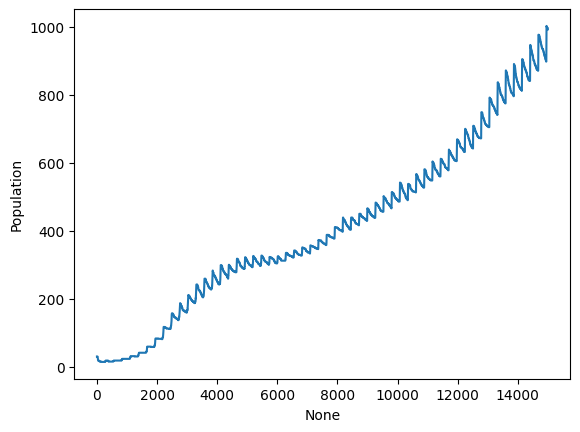

In [6]:
sns.lineplot(
    data=model_data,
    x=model_data.index,
    y="Population",
    legend=False
)

<Axes: xlabel='None', ylabel='Carriers'>

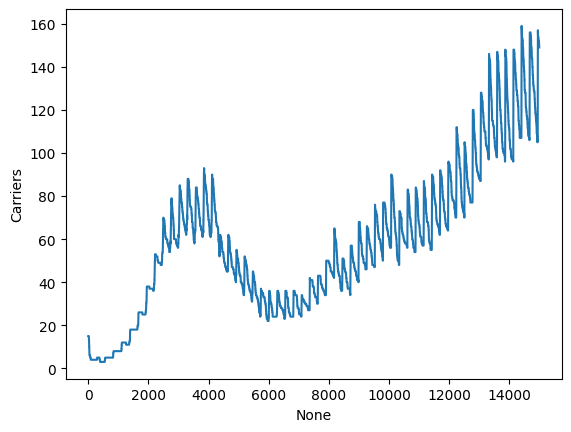

In [7]:
sns.lineplot(
    data=model_data,
    x=model_data.index,
    y="Carriers",
    legend=False
)

<Axes: xlabel='None', ylabel='Givers'>

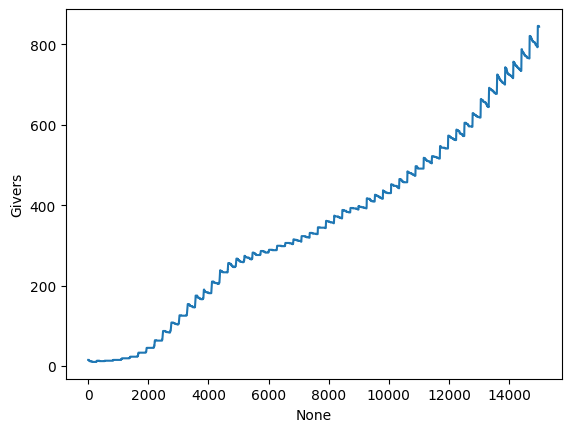

In [8]:
sns.lineplot(
    data=model_data,
    x=model_data.index,
    y="Givers",
    legend=False
)

In [11]:
print(1 - model.dist.cdf(model.habitability))

0.08169934640522891
